<a href="https://colab.research.google.com/github/dev-satabda/README/blob/main/Study_Hours_vs_Exam_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [13]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
#Read csv
df = pd.read_csv("score.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Split x and y
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

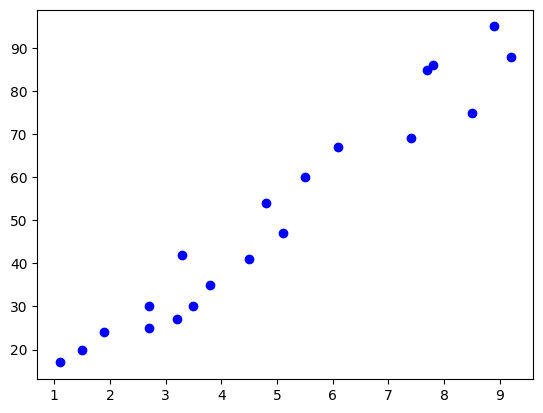

In [11]:
#Plot scatter Training set
plt.scatter(X_train, y_train, color='blue', label='Training Data')

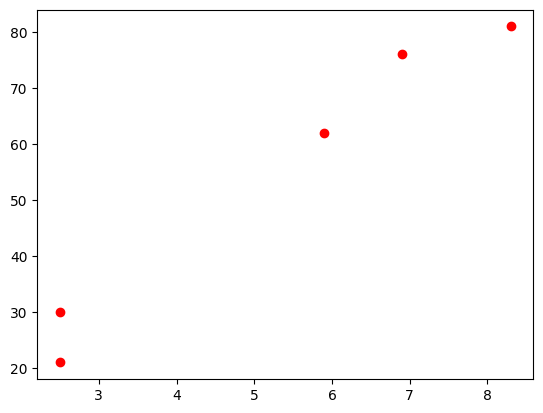

In [12]:
#Plot scatter Test set
plt.scatter(X_test, y_test, color='red', label='Testing Data')

In [18]:
#Scalling
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)) # Reshape y_train to a 2D array
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)) # Reshape y_test to a 2D array

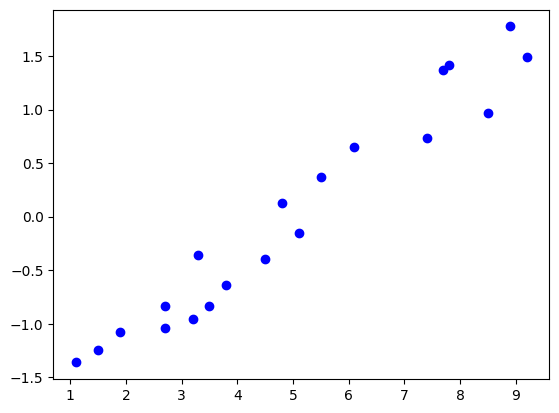

In [19]:
#Plot scatter Training set
plt.scatter(X_train, y_train_scaled, color='blue', label='Training Data')

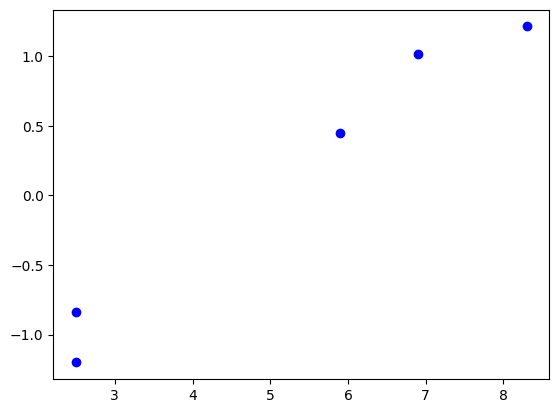

In [21]:
#Plot scatter Test set
plt.scatter(X_test, y_test_scaled, color='blue', label='Test Data')

In [22]:
#Train the model
model = LinearRegression()
model.fit(X_train, y_train_scaled)

LinearRegression()

In [23]:
#Test the model
y_pred = model.predict(X_test)

In [24]:
#Evaluate
mse = mean_squared_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)

In [27]:
r2

0.9678055545167994

In [31]:
#Compare predicted value with the actual value in dataframe
df_pred = pd.DataFrame({'Actual': y_test_scaled.flatten(), 'Predicted': y_pred.flatten()})
df_pred

,Actual,Predicted
0,1.212588,1.300591
1,-0.838556,-0.957921
2,-1.200522,-0.957921
3,1.011495,0.755433
4,0.448436,0.366035
